# Example showing the output produced by the photoionization models

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Loading in the line labels, luminosity and parameter value files

In [88]:
all_labels = np.load('test_model_v5_emission_line_labels.npy')
all_labels_dict = dict(zip(all_labels, range(len(all_labels))))
all_line_luminosities = np.load('test_model_v5_emission_line_luminosity_file.npy')
parameter_values = np.load('test_model_v5_parameters_file.npy')
all_line_luminosities.shape

labels = ['O__2_372600A', 'H__1_486136A', 'O__3_500700A', 'H__1_656285A', 'N__2_658400A', 'S__2_671600A']
args = [all_labels_dict.get(key) for key in labels]

### Luminosity and parameter files are structured in multidimensional way
- Dimension 1: Metallicities
- Dimension 2: Ionization parameter
- Dimension 3: Dust-to-metal ratio
- Dimension 4: Dust attenuation
- The last dimension in the parameter file has the parameter values of the main parameters (as listed above) + derived parameters. The last dimension of the luminosity file contains the luminosities of all the emission lines in the line labels file.

In [89]:
parameter_values.shape

(15, 2, 2, 4, 7)

In [90]:
all_line_luminosities.shape

(15, 2, 2, 4, 127)

### Plotting the modelled emission line ratios in a BPT diagram

9 79 8 59


(-1.5, 1.2)

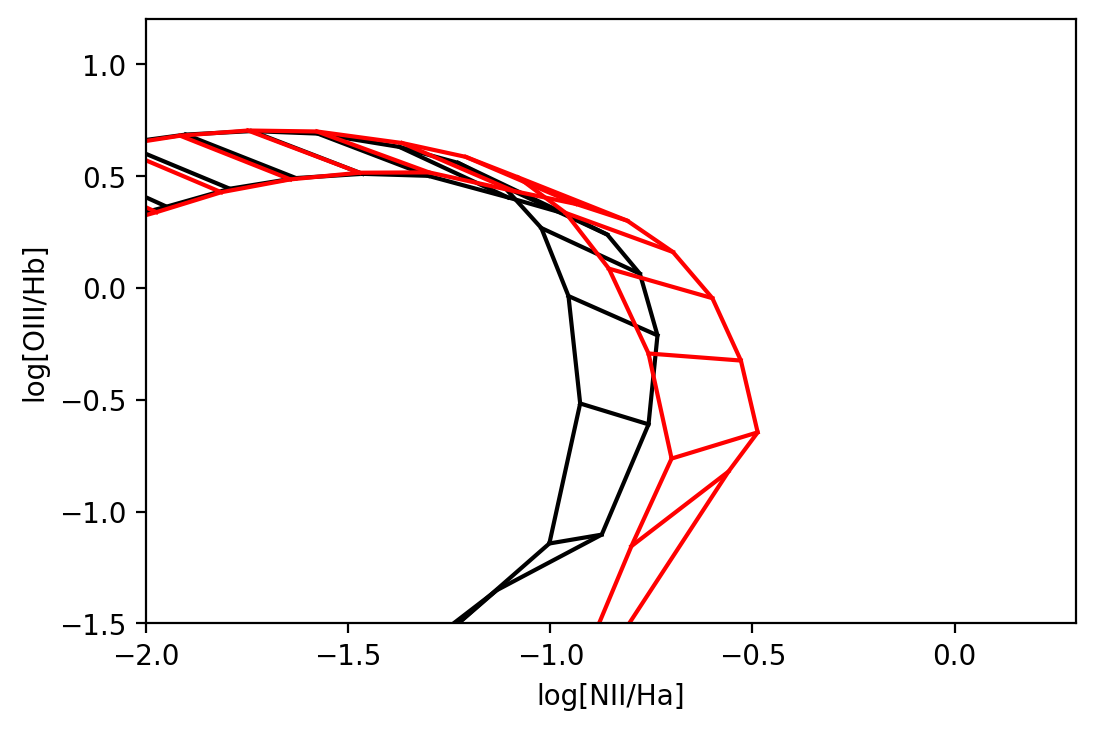

In [93]:
Hb, OIII, Ha, NII = [all_labels_dict.get(key) for key in ['H__1_486136A', 'O__3_500700A', 'H__1_656285A', 'N__2_658400A']]
print(Hb, OIII, Ha, NII)
colors=['k','r','b']
plt.figure(dpi=200)
for i in range(2):
    plt.plot(np.log10(all_line_luminosities[:,:,i,0,NII]/all_line_luminosities[:,:,i,0,Ha]), 
             np.log10(all_line_luminosities[:,:,i,0,OIII]/all_line_luminosities[:,:,i,0,Hb]), c=colors[i])
    plt.plot(np.log10(all_line_luminosities[:,:,i,0,NII]/all_line_luminosities[:,:,i,0,Ha]).T, 
             np.log10(all_line_luminosities[:,:,i,0,OIII]/all_line_luminosities[:,:,i,0,Hb]).T, c=colors[i])

plt.xlabel('log[NII/Ha]')
plt.ylabel('log[OIII/Hb]')
plt.xlim(-2.0,0.3)
plt.ylim(-1.5,1.2)